In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Crypten

In [2]:
crypten_data = pd.read_csv('../chz-sok-nn-experiments/crypten_experiments/datasize_cifar_nn.csv',
                           skiprows=(lambda x: (x % 2 != 0)),
                           header=None,
                           )
# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
crypten_data.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']

# crypten_data = crypten_data.drop(index=range(14))

print(crypten_data)

mean_crypten = crypten_data.groupby('data_size')['epoch_duration'].sum()
print(mean_crypten)

# stdev_crypten = crypten_data.groupby('data_size')['epoch_duration'].std()
# print(stdev_crypten)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0      1819.017764      0           4       6250    0.1000    1452.876921
1      1817.016536      1           4       6250    0.1000    1446.560707
2      1814.457554      2           4       6250    0.1046    1449.404645
3      3634.132885      0           4      12500    0.1027    1445.912936
4      3610.095333      1           4      12500    0.1698    1448.630184
5      3609.196545      2           4      12500    0.1851    1455.581509
6      7248.600064      0           4      25000    0.1953    1457.768201
7      7288.875419      1           4      25000    0.2708    1457.130322
8      7297.271319      2           4      25000    0.3157    1459.954482
9     14631.262090      0           4      50000    0.2437    1454.268548
10    14630.332842      1           4      50000    0.3565    1460.487742
11    14577.700550      2           4      50000    0.4193    1446.420724
data_size
6250      5450.491855
12500 

# Plaintext Torch

In [3]:
torch_data = pd.read_csv('../chz-sok-nn-experiments/torch_experiments/cifar/cifar_total_time.csv',
                         header=None,
                         )
torch_data.columns = ['total_duration', 'data_size']

# print(torch_data)

torch_medians = torch_data.groupby('data_size')['total_duration'].median()
print(torch_medians)
torch_stdev = torch_data.groupby('data_size')['total_duration'].std()
print(torch_stdev)

data_size
6250     18.684848
12500    26.521270
25000    42.242750
50000    73.920016
Name: total_duration, dtype: float64
data_size
6250     0.070759
12500    0.074594
25000    0.145050
50000    0.211886
Name: total_duration, dtype: float64


# NVFlare

In [4]:
nvflare_medians = []
nvflare_stdevs = []
for datasize in [6250, 12500, 25000, 50000]:
    nvflare_data = pd.read_csv(f'../chz-sok-nvflare-experiments/fl-nn/experiments/cifar/{datasize}/total_time.csv',
                header=None,
                )
    # total_duration, run_id, timestamp
    nvflare_data.columns = ['total_duration', 'run_id', 'timestamp']
    nvflare_medians.append(nvflare_data['total_duration'].median())
    nvflare_stdevs.append(nvflare_data['total_duration'].std())
print(nvflare_medians)
print(nvflare_stdevs)

[43.8550905, 48.458726, 59.1906125, 83.0692735]
[26.98306448664184, 1.6646903568020663, 1.4862781067224409, 0.9789495431901659]


# Data Station

In [5]:
ds_data = pd.read_csv('../datastation-escrow/examples/training_scenario/cifar/cifar_total_time.csv',
                        header=None,
                        )
# total_duration, data_size
ds_data.columns = ['total_duration', 'data_size']

ds_medians = ds_data.groupby('data_size')['total_duration'].median()
ds_stdevs = ds_data.groupby('data_size')['total_duration'].std()

print(ds_medians)
print(ds_stdevs)

data_size
6250     23.025263
12500    30.629205
25000    46.393899
50000    78.752173
Name: total_duration, dtype: float64
data_size
6250     0.812057
12500    1.097774
25000    0.306038
50000    0.571279
Name: total_duration, dtype: float64


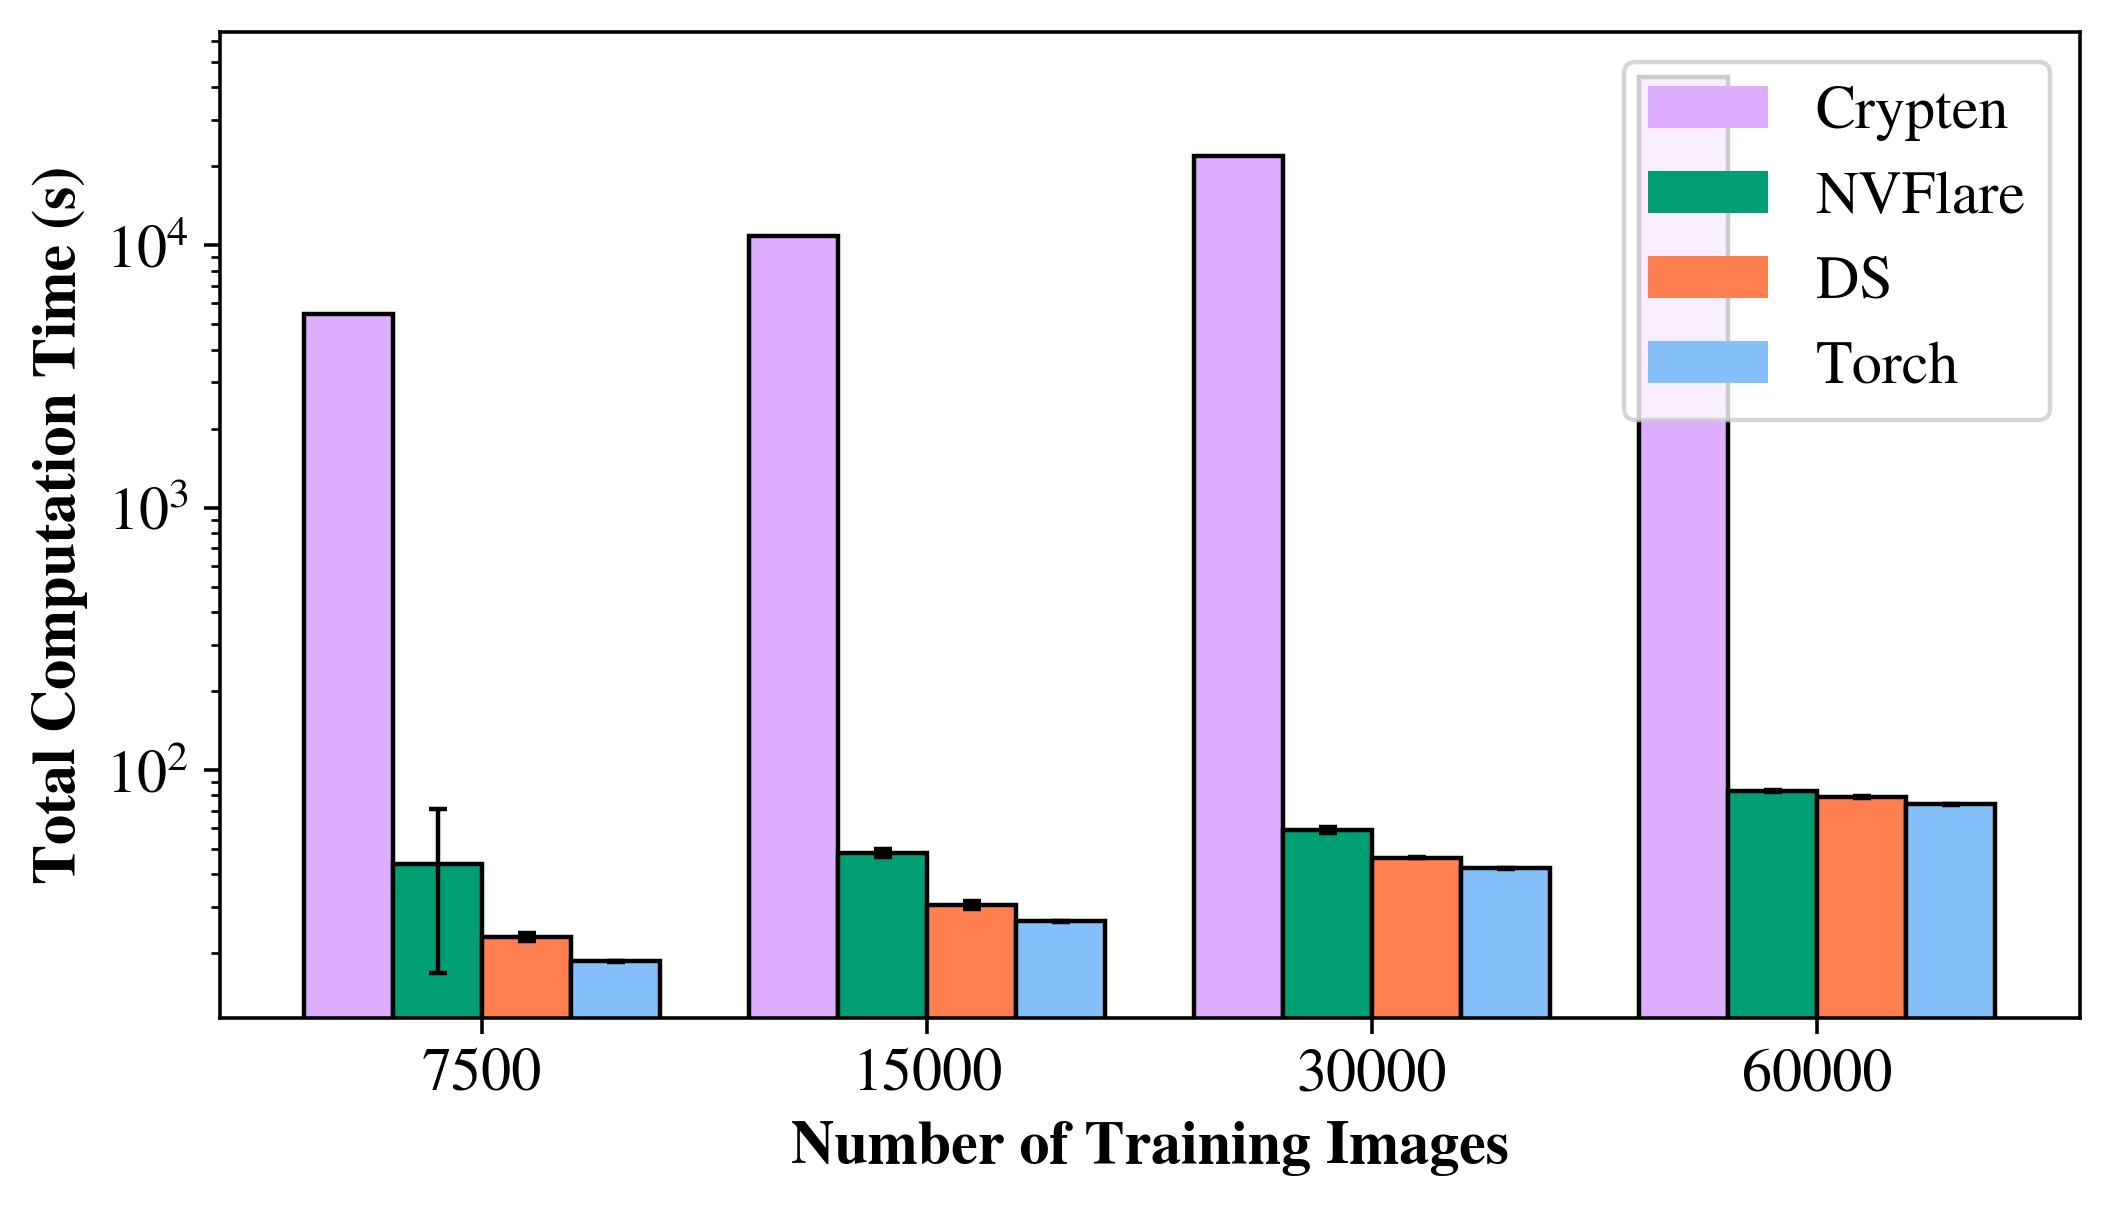

In [6]:
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

# Crypten
plt.bar(x=X_axis-1.5*width, width=width, height = mean_crypten, label = "Crypten", color='#ddaeff')
plt.bar(x=X_axis-1.5*width,width=width,height=mean_crypten,
        # yerr=conclave_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

# NVFlare
plt.bar(x=X_axis-0.5*width, width=width, height = nvflare_medians, label = "NVFlare", color='#009E73')
plt.bar(x=X_axis-0.5*width,width=width,height=nvflare_medians,yerr=nvflare_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

# Data Station
plt.bar(x=X_axis+0.5*width, width=width, height = ds_medians, label = "DS", color='coral')
plt.bar(x=X_axis+0.5*width,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

# Torch
plt.bar(x=X_axis+1.5*width, width=width, height = torch_medians, label = "Torch", color='#85C0F9')
plt.bar(x=X_axis+1.5*width,width=width,height=torch_medians,
        yerr=torch_stdev,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.yscale('log')

plt.xlabel("Number of Training Images", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
# plt.title("Basic NN Training Time on FashionMNIST")
plt.legend()

plt.xticks(X_axis, ["7500", "15000", "30000", "60000"])

plt.savefig("datasize_cifar_nn.pdf", bbox_inches='tight')

plt.show()